<a href="https://colab.research.google.com/github/Anubhav4989/DSP10/blob/main/39_Dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: **Anubhav Kumar Tiwary**

PRN: **2301208039**

Semester 4: **Dissertation**

# **Enhancing Supply Chain Decision-Making and Strategic Planning using Machine Learning and Neural Networks**

This project is carried out under the guidance of:  
- Prof. Vishnupant Potdar  
- Prof. Shubhangi P. Tidake  

##  **Problem Statement 🔍**

In modern supply chain operations, ensuring timely delivery of goods is one of the most critical yet challenging tasks. Delays not only disrupt logistical flow but also significantly affect customer satisfaction and operational efficiency. Traditional methods for estimating delivery times often lack the adaptability and intelligence required to handle dynamic real-world scenarios. As a result, there is a growing need for intelligent, data-driven models that can accurately predict delivery times and reduce uncertainties. While several studies have explored predictive approaches using machine learning, many existing models still struggle with suboptimal accuracy. Therefore, this research aims to develop a robust, scalable, and highly accurate prediction model using advanced machine learning and neural network techniques to enhance delivery time forecasting within the supply chain domain, thereby supporting better decision-making and performance optimization.

##  **About the Dataset  📊**

This Amazon Delivery Dataset provides a comprehensive view of the company's last-mile logistics operations. It includes data on over 43,632 deliveries across multiple cities, with detailed information on order details, delivery agents, weather and traffic conditions, and delivery performance metrics. The dataset enables researchers and analysts to uncover insights into factors influencing delivery efficiency, identify areas for optimization, and explore the impact of various variables on the overall customer experience.

**Source**: [https://www.kaggle.com/datasets/sujalsuthar/amazon-delivery-dataset/data](https://www.kaggle.com/datasets/sujalsuthar/amazon-delivery-dataset/data)

**Column Descriptions**:

| Column Name       | Description                                  |
|-------------------|----------------------------------------------|
| Order_ID          | Unique identifier for each order             |
| Agent_Age         | Age of the delivery agent                    |
| Agent_Rating      | Performance rating of the agent              |
| Store_Latitude    | Latitude of the store location               |
| Store_Longitude   | Longitude of the store location              |
| Drop_Latitude     | Latitude of the delivery destination         |
| Drop_Longitude    | Longitude of the delivery destination        |
| Order_Date        | Date when the order was placed               |
| Order_Time        | Time when the order was placed               |
| Pickup_Time       | Time when the order was picked up            |
| Weather           | Weather conditions during the delivery       |
| Traffic           | Traffic conditions during the delivery       |
| Vehicle           | Type of vehicle used for delivery            |
| Area              | Area type (e.g., Urban, Metropolitan)        |
| Delivery_Time     | Time taken to complete the delivery          |
| Category          | Product category of the order                |

This dataset will be used in the dissertation to explore how machine learning and neural networks can improve last-mile delivery efficiency, contributing to better decision-making and optimization in supply chain management.

## **Import Necessary Libraries**

In [1]:
# Data Handling & Processing
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings Ignore
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported successfully!")

Libraries imported successfully!


## **Load the Dataset**

In [2]:
# # For VS Code
# data = pd.read_csv("amazon_delivery.csv")

In [3]:
# # For Google Colab
# from google.colab import files

# # Upload file
# uploaded = files.upload()

# # Read the uploaded CSV file
# data = pd.read_csv(next(iter(uploaded)))

In [4]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Dataset
data = pd.read_csv('https://drive.google.com/uc?id=1ZcvvgxZ36pl1Gi1LUClDIANRs83yVJmH&export=download', encoding='iso-8859-1')

## **Quick Overview of the Dataset**

In [6]:
data.head(10)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
5,fxuu788413734,22,4.8,17.431668,78.408321,17.461668,78.438321,2022-03-11,21:20:00,21:30:00,Cloudy,Jam,motorcycle,Urban,130,Toys
6,njmo150975311,33,4.7,23.369746,85.339820,23.479746,85.449820,2022-03-04,19:15:00,19:30:00,Fog,Jam,scooter,Metropolitian,200,Toys
7,jvjc772545076,35,4.6,12.352058,76.606650,12.482058,76.736650,2022-03-14,17:25:00,17:30:00,Cloudy,Medium,motorcycle,Metropolitian,160,Snacks
8,uaeb808891380,22,4.8,17.433809,78.386744,17.563809,78.516744,2022-03-20,20:55:00,21:05:00,Stormy,Jam,motorcycle,Metropolitian,170,Electronics
9,bgvc052754213,36,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55:00,22:10:00,Fog,Jam,motorcycle,Metropolitian,230,Toys


In [7]:
data.tail()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen
43738,nsyz997960170,23,4.9,23.351058,85.325731,23.431058,85.405731,2022-03-02,17:10:00,17:15:00,Fog,Medium,scooter,Metropolitian,180,Cosmetics


In [8]:
data.shape

(43739, 16)

In [9]:
data.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'],
      dtype='object')

In [10]:
data.dtypes

,0
Order_ID,object
Agent_Age,int64
Agent_Rating,float64
Store_Latitude,float64
Store_Longitude,float64
Drop_Latitude,float64
Drop_Longitude,float64
Order_Date,object
Order_Time,object
Pickup_Time,object


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [12]:
data.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


## **Data Preprocessing**

In [13]:
# Check & Handle Missing Values

# Missing values check
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64


In [14]:
# Remove rows with missing values (Simple Approach)
data = data.dropna()

# Check again
print("Missing Values Now:")
print(data.isnull().sum())

Missing Values Now:
Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64


In [15]:
# Check & Remove Duplicate Rows

# Count duplicates
duplicates = data.duplicated().sum()
print("Total Duplicate Rows:", duplicates)

Total Duplicate Rows: 0


In [16]:
# Standardization and Conversion of Data Types

# Standardize object columns (convert to string for consistency)
string_columns = ['Order_ID', 'Weather', 'Traffic', 'Vehicle', 'Area', 'Category']

# Convert all specified columns to string
for col in string_columns:
    data[col] = data[col].astype(str)

# Standardize integer columns
data['Agent_Age'] = data['Agent_Age'].astype(int)          # Ensure 'Agent_Age' is an integer
data['Delivery_Time'] = data['Delivery_Time'].astype(int)  # Ensure 'Delivery_Time' is an integer

# Standardize float columns
coordinates_columns = ['Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude']
for col in coordinates_columns:
    data[col] = data[col].astype(float)

In [17]:
# Feature Extraction and Engineering

# Order_Date, Order_Time, and Pickup_Time were converted to datetime format to enable accurate time-based analysis and feature extraction
data['Order_Date'] = pd.to_datetime(data['Order_Date'], errors='coerce')
data['Order_Time'] = pd.to_datetime(data['Order_Time'], format='%H:%M:%S', errors='coerce').dt.time
data['Pickup_Time'] = pd.to_datetime(data['Pickup_Time'], format='%H:%M:%S', errors='coerce').dt.time

In [18]:
# Time Features Extraction (from Order_Time and Pickup_Time)

# Extract total hours from Order_Time
data['Order_Hour'] = pd.to_datetime(data['Order_Time'], format='%H:%M:%S').apply(lambda x: x.hour)

# Extract total hours from Pickup_Time
data['Pickup_Hour'] = pd.to_datetime(data['Pickup_Time'], format='%H:%M:%S').apply(lambda x: x.hour)

# Extract total minutes from Order_Time
data['Order_Time_Minutes'] = pd.to_datetime(data['Order_Time'], format='%H:%M:%S', errors='coerce')\
                        .apply(lambda x: x.hour * 60 + x.minute + x.second / 60 if pd.notnull(x) else np.nan)

# Extract total minutes from Pickup_Time
data['Pickup_Time_Minutes'] = pd.to_datetime(data['Pickup_Time'], format='%H:%M:%S', errors='coerce')\
                        .apply(lambda x: x.hour * 60 + x.minute + x.second / 60 if pd.notnull(x) else np.nan)

# Calculate Order Processing Time in minutes (pickup - order)
data['Order Processing Time'] = data['Pickup_Time_Minutes'] - data['Order_Time_Minutes']

In [19]:
# Weekend Indicator
data['Order_DayOfWeek'] = data['Order_Date'].dt.dayofweek

# 0 → Monday
# 1 → Tuesday
# 2 → Wednesday
# 3 → Thursday
# 4 → Friday
# 5 → Saturday
# 6 → Sunday

data['Is_Weekend'] = data['Order_DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

In [20]:
# Removal of Outliers

# Remove outliers if they affect model
q1 = data['Delivery_Time'].quantile(0.25)
q3 = data['Delivery_Time'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
data = data[(data['Delivery_Time'] >= lower) & (data['Delivery_Time'] <= upper)]

**Validate Latitude/Longitude Ranges**:

Some entries have suspicious geographic coordinates (like negative or very small values such as -30 or 0.01), which are unrealistic for store and drop locations.

**Action**: Filter out rows where `Store_Latitude` or `Drop_Latitude` are less than 1, as these are likely to be invalid.

**Valid range**:
- **Latitude** should be between -90 and 90
- **Longitude** should be between -180 and 180

Although valid latitude ranges from -90 to +90 globally, entries with latitude < 1 were removed because the dataset is focused on India, where realistic latitudes typically lie between 8°N and 37°N. Values below 1 are considered erroneous for this region and likely due to data entry errors.

In [21]:
# Remove rows with unrealistic latitude values (less than 1)
data = data[(data['Store_Latitude'] > 1) & (data['Drop_Latitude'] > 1)]

In [22]:
# Calculate actual delivery distance between store and drop location using Haversine formula based on latitude and longitude
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in KM
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c  # in KM

data['Distance_km'] = data.apply(lambda row: haversine(row['Store_Latitude'], row['Store_Longitude'],
                                                       row['Drop_Latitude'], row['Drop_Longitude']), axis=1)

Records with distance over 50 KM and delivery time exceeding 2 hours (120 minutes) were treated as extreme outliers based on domain assumptions of local urban logistics. These outliers could be due to entry errors or rare operational exceptions that would otherwise distort the predictive model.

In [23]:
# Remove Extreme Outliers in Distance and Delivery_Duration

# Remove rows with Distance > 50 KM (Assumption: unlikely for local delivery)
data = data[data['Distance_km'] <= 50]

# Remove 'Order Processing Time (in minutes)' if negative or over 2 hours
data = data[(data['Order Processing Time'] >= 0) & (data['Order Processing Time'] <= 120)]

In [24]:
# Final Check
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39128 entries, 0 to 43738
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Order_ID               39128 non-null  object        
 1   Agent_Age              39128 non-null  int64         
 2   Agent_Rating           39128 non-null  float64       
 3   Store_Latitude         39128 non-null  float64       
 4   Store_Longitude        39128 non-null  float64       
 5   Drop_Latitude          39128 non-null  float64       
 6   Drop_Longitude         39128 non-null  float64       
 7   Order_Date             39128 non-null  datetime64[ns]
 8   Order_Time             39128 non-null  object        
 9   Pickup_Time            39128 non-null  object        
 10  Weather                39128 non-null  object        
 11  Traffic                39128 non-null  object        
 12  Vehicle                39128 non-null  object        
 13  Area  

## **Exploratory Data Analysis (EDA)**

### **Agent Behavior 🕵**

#### **1️⃣ How does Agent Age influence Delivery Time and the Distribution of Orders across age groups?**

In [25]:
# Create age groups
data['Age_Group'] = pd.cut(data['Agent_Age'], bins=[20, 25, 30, 35, 40], labels=['21-25', '26-30', '31-35', '36-40'])

group_avg = data.groupby('Age_Group')['Delivery_Time'].mean()
print(group_avg)

Age_Group
21-25    109.611128
26-30    115.617509
31-35    141.107625
36-40    140.337202
Name: Delivery_Time, dtype: float64


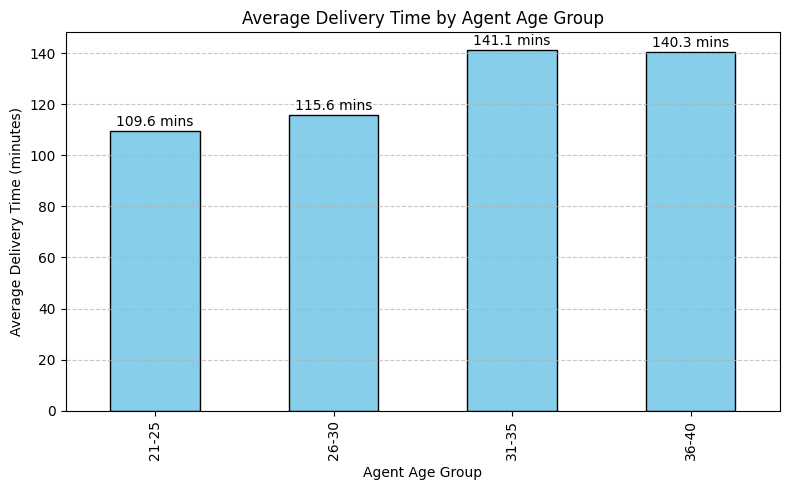

In [26]:
plt.figure(figsize=(8, 5))

# Plot the bar chart
ax = group_avg.plot(kind='bar', color='skyblue', edgecolor='black')

# Annotate values on bars
for idx, val in enumerate(group_avg.values):
    plt.text(idx, val + 2, f'{val:.1f} mins', ha='center', fontsize=10)

# Set titles and labels
plt.title('Average Delivery Time by Agent Age Group')
plt.xlabel('Agent Age Group')
plt.ylabel('Average Delivery Time (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [27]:
age_counts = data['Age_Group'].value_counts().sort_index()
print(age_counts)

Age_Group
21-25    9723
26-30    9778
31-35    9784
36-40    7927
Name: count, dtype: int64


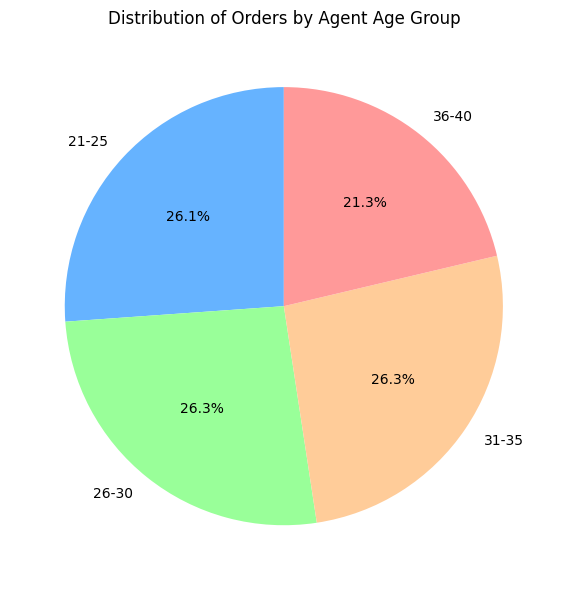

In [28]:
# Pie Chart: Distribution of Orders by Agent Age Group
plt.figure(figsize=(6,6))
age_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99','#ff9999'])
plt.title('Distribution of Orders by Agent Age Group')
plt.ylabel('')  # Hide y-axis label
plt.tight_layout()
plt.show()

**Insights**:  

- There is a clear inverse relationship between Agent Age and Delivery Speed.
- Younger agents aged 21–25 have the fastest average delivery time of 110 minutes, followed by the 26–30 age group with 116 minutes.
- Agents in the 31–35 and 36–40 groups have the slowest average delivery times, clocking in at 141 minutes and 140 minutes, respectively.
- This suggests that older agents tend to take 25–30 minutes longer per delivery compared to younger agents — possibly due to reduced agility, or stamina.
- Businesses can optimize logistics and shift allocations by balancing the workload between age groups to improve overall delivery efficiency.
- Age groups 21–25, 26–30, and 31–35 handled almost equal proportion of orders, around 26 percent each, indicating a balanced workload among younger agents.
- The age group 36–40 handled fewer orders, approximately 21 percent, suggesting they may be less frequently assigned or less active overall.

#### **2️⃣ Do higher-rated agents consistently deliver faster?**

In [29]:
# Calculate correlation
correlation = data['Agent_Rating'].corr(data['Delivery_Time'])
print(f"Correlation between Agent Rating and Delivery Time: {correlation:.4f}")

Correlation between Agent Rating and Delivery Time: -0.3083


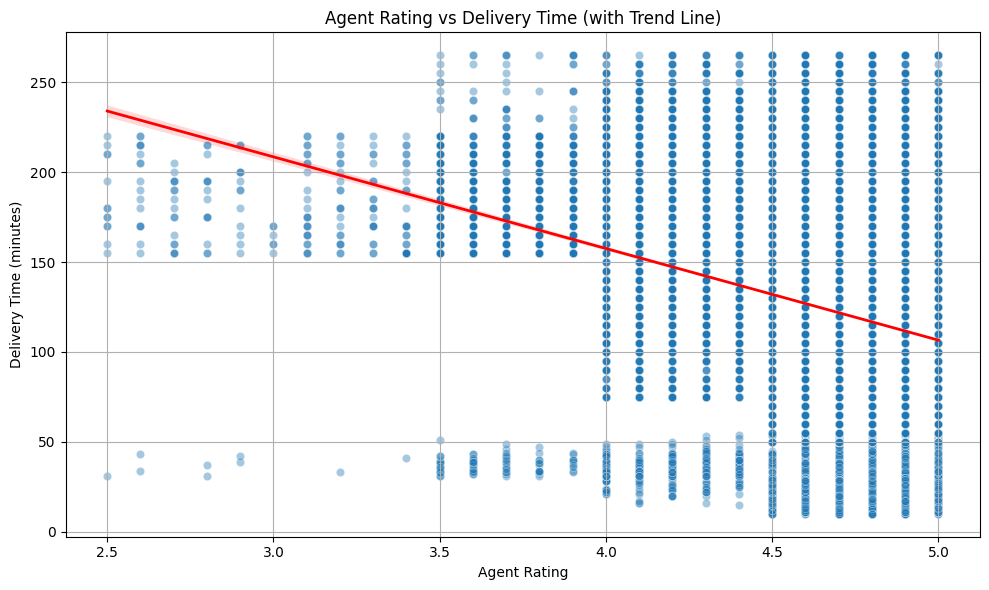

In [30]:
# Scatter + Regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Agent_Rating', y='Delivery_Time', data=data, alpha=0.4)
sns.regplot(x='Agent_Rating', y='Delivery_Time', data=data, scatter=False, color='red', line_kws={"linewidth": 2})
plt.title('Agent Rating vs Delivery Time (with Trend Line)')
plt.xlabel('Agent Rating')
plt.ylabel('Delivery Time (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insights**:

- Agents with higher ratings tend to deliver faster, as shown by the negative correlation of -0.3093 between agent rating and delivery time.
- This suggests that better-performing agents (higher rated) are generally more efficient in deliveries.

### **Location-Based 📍**

#### **3️⃣  In which area has the fastest delivery times?**

In [31]:
# Find the average delivery time for each area type
area_avg_time = data.groupby('Area')['Delivery_Time'].mean().sort_values()

# Print result
print("Average Delivery Time by Area Type (in minutes):")
print(area_avg_time)

Average Delivery Time by Area Type (in minutes):
Area
Other             104.744807
Urban             109.777291
Metropolitian     129.968358
Semi-Urban        234.902439
Name: Delivery_Time, dtype: float64


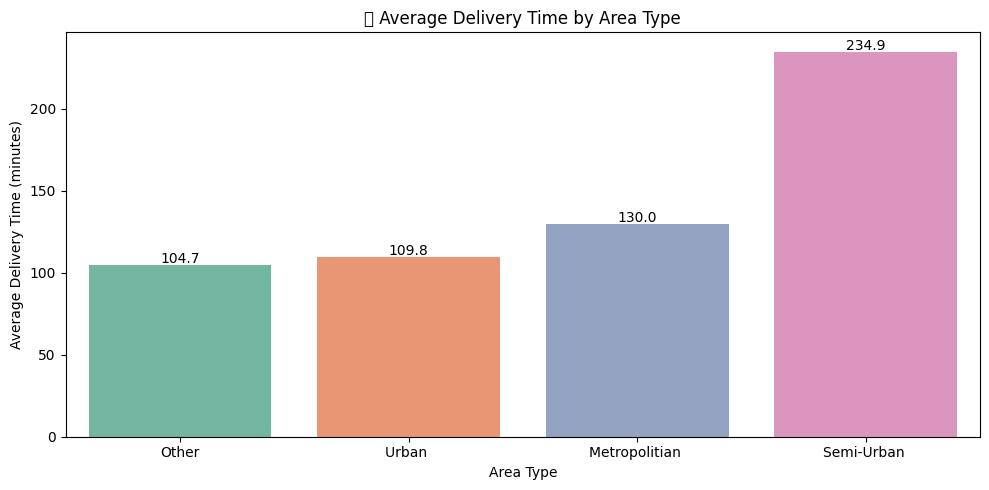

In [32]:
# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=area_avg_time.index, y=area_avg_time.values, palette='Set2')
plt.title("⏱️ Average Delivery Time by Area Type")
plt.xlabel("Area Type")
plt.ylabel("Average Delivery Time (minutes)")

# Add labels on bars
for i, val in enumerate(area_avg_time.values):
    plt.text(i, val + 1, f"{val:.1f}", ha='center')

plt.tight_layout()
plt.show()

**Insights:**

- Other areas have the fastest average delivery time at approximately 105 minutes.
- Urban areas follow closely, with an average delivery time of around 110 minutes.
- Metropolitan areas have a moderate delivery time of about 130 minutes.
- Semi-Urban areas have the slowest deliveries, taking approximately 235 minutes, which is over 2 times slower than Urban and Other areas.



### **Time Analysis 🕒**

#### **4️⃣ Which time of day sees the longest delivery times?**

In [33]:
# Define time bins
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply binning
data['Time_of_Day'] = data['Pickup_Hour'].apply(get_time_of_day)

# Group by time of day and calculate average delivery time
time_avg = data.groupby('Time_of_Day')['Delivery_Time'].mean().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

print(time_avg)

Time_of_Day
Morning       99.806905
Afternoon    123.041645
Evening      138.025182
Night        123.344141
Name: Delivery_Time, dtype: float64


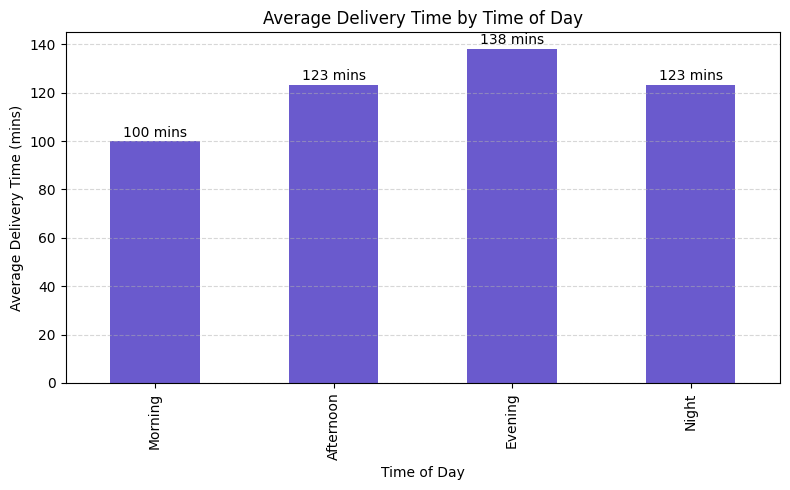

In [34]:
# Plotting
plt.figure(figsize=(8, 5))
time_avg.plot(kind='bar', color='slateblue')

plt.title('Average Delivery Time by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Delivery Time (mins)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate bars
for idx, val in enumerate(time_avg):
    plt.text(idx, val + 2, f'{val:.0f} mins', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

**Insights**:

- Evening deliveries take the longest on average of 138 mins, noticeably higher than other time slots.
- Morning orders are the fastest, averaging just around 100 mins.
- Both Afternoon at 123 mins and Night at 122 mins lie in the middle but are still quicker than evening.

#### **5️⃣ Are weekend deliveries faster or slower than weekdays?**

In [35]:
# Create a new column for day of the week
data['DayOfWeek'] = data['Order_Date'].dt.day_name()

# Map days to Weekday/Weekend
weekend_map = {
    'Monday': 'Weekday',
    'Tuesday': 'Weekday',
    'Wednesday': 'Weekday',
    'Thursday': 'Weekday',
    'Friday': 'Weekday',
    'Saturday': 'Weekend',
    'Sunday': 'Weekend'
}
data['Day_Type'] = data['DayOfWeek'].map(weekend_map)

# Group by Day_Type and calculate average delivery time
day_type_avg = data.groupby('Day_Type')['Delivery_Time'].mean()

# Print results
for day_type, avg_time in day_type_avg.items():
    print(f"{day_type}: {avg_time:.2f} mins")

Weekday: 125.22 mins
Weekend: 125.06 mins


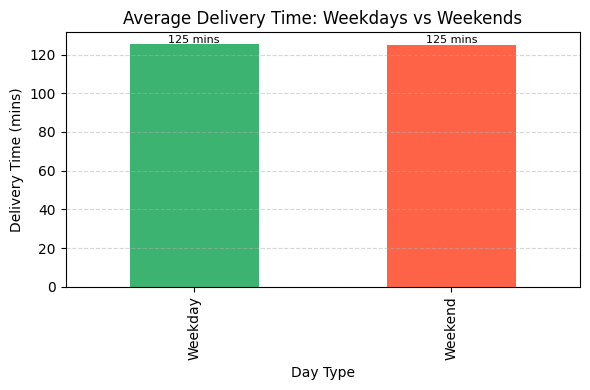

In [36]:
# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
colors = ['mediumseagreen', 'tomato']
day_type_avg.plot(kind='bar', color=colors)

plt.title('Average Delivery Time: Weekdays vs Weekends')
plt.ylabel('Delivery Time (mins)')
plt.xlabel('Day Type')

# Annotate bars
for idx, value in enumerate(day_type_avg):
    plt.text(idx, value + 1, f'{value:.0f} mins', ha='center', fontsize=8)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Insights**:

- Weekend and Weekday delivery times are identical.
- This suggests no significant impact.

### **External Factors 🌦**

#### **6️⃣ Which weather condition leads to maximum delays?**

In [37]:
# Group by weather and calculate average delivery time
weather_avg = data.groupby('Weather')['Delivery_Time'].mean().sort_values(ascending=False)

# Display results
print("Average Delivery Time by Weather Condition (in minutes):\n")
print(weather_avg)

Average Delivery Time by Weather Condition (in minutes):

Weather
Cloudy        138.614456
Fog           136.870666
Windy         124.079020
Stormy        123.803122
Sandstorms    123.606308
Sunny         103.289937
Name: Delivery_Time, dtype: float64


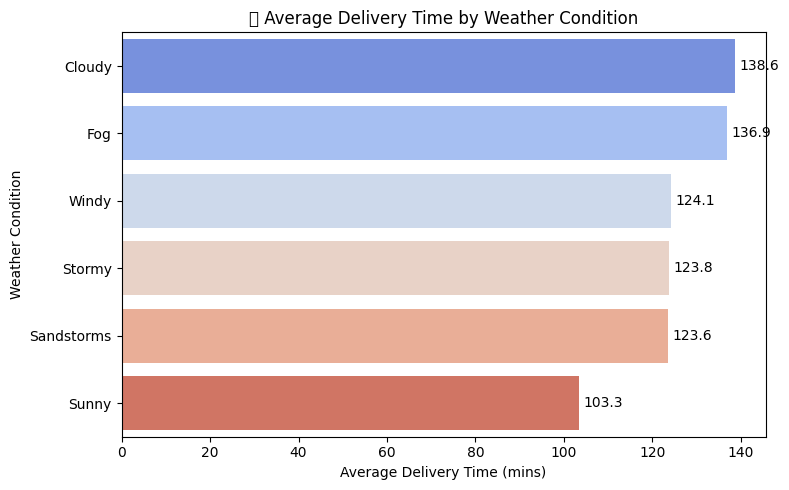

In [38]:
# Visualize
plt.figure(figsize=(8, 5))
sns.barplot(x=weather_avg.values, y=weather_avg.index, palette='coolwarm')
plt.title("⛅ Average Delivery Time by Weather Condition")
plt.xlabel("Average Delivery Time (mins)")
plt.ylabel("Weather Condition")

# Add labels on bars
for i, value in enumerate(weather_avg.values):
    plt.text(value + 1, i, f"{value:.1f}", va='center')

plt.tight_layout()
plt.show()

**Insights:**

- Cloudy weather results in the longest delivery times, averaging around 139 minutes, likely due to poor visibility or uncertain conditions.
- Foggy conditions also contribute to significant delays, with an average delivery time of around 137 minutes.
- Sunny weather is the most efficient for deliveries, having the shortest average delivery time of just 103 minutes.
- Windy, Stormy, and Sandstorm conditions fall in the mid-range, but all lead to slower deliveries compared to clear weather.

#### **7️⃣ Correlation Matrix Heatmap Code**

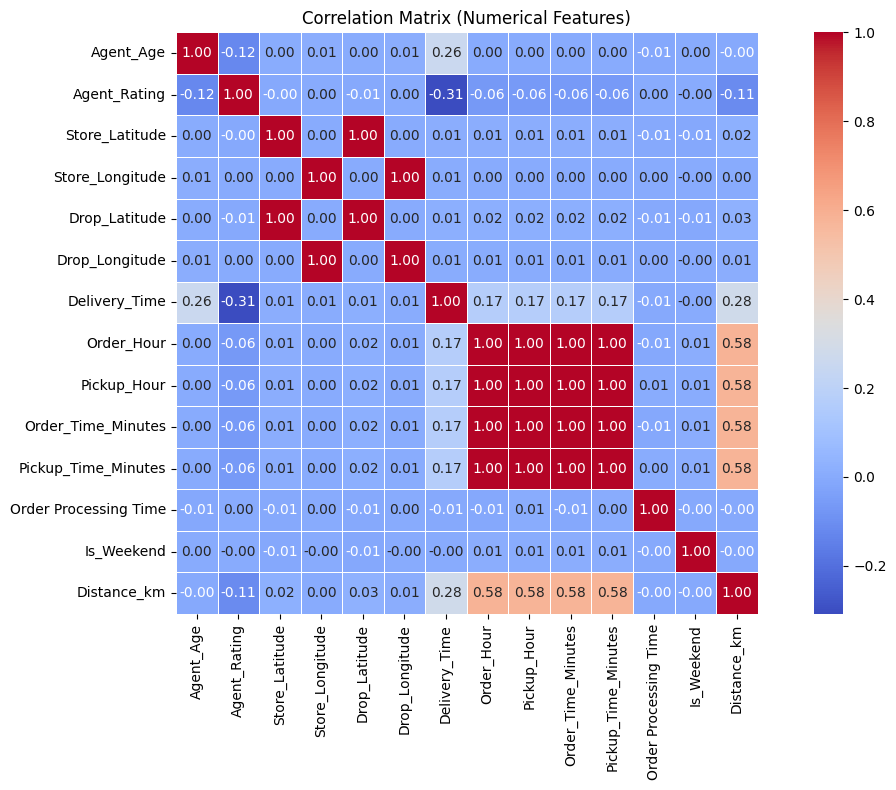

In [39]:
# Select only numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numerical_features.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Matrix (Numerical Features)")
plt.tight_layout()
plt.show()

## **Feature Engineering**

In [40]:
# Categorical Encoding

# Convert Categorical Columns
data = pd.get_dummies(data, columns=['Weather', 'Traffic', 'Vehicle', 'Area', 'Category'], drop_first=True)

In [41]:
# Multicollinearity removal

# Select only numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numerical_data.corr().abs()

# Create a mask for upper triangle
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > 0.85 (you can change threshold)
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]

print("Highly correlated features to drop:", to_drop)

# Drop them from dataframe
df_reduced = data.drop(columns=to_drop)

Highly correlated features to drop: ['Drop_Latitude', 'Drop_Longitude', 'Pickup_Hour', 'Order_Time_Minutes', 'Pickup_Time_Minutes']


In [42]:
# Remove Multicollinear Features
data.drop(['Drop_Latitude', 'Drop_Longitude', 'Pickup_Hour', 'Order_Time_Minutes', 'Pickup_Time_Minutes'], axis=1, inplace=True)

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Select only numeric columns (excluding datetime, object, category types)
numeric_cols = data.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()

# OPTIONAL: Drop target column if present
numeric_cols = [col for col in numeric_cols if col != 'Delivery_Time']

# Initialize and apply MinMaxScaler
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

print(f"MinMax Scaling applied on columns:\n{numeric_cols}")

MinMax Scaling applied on columns:
['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude', 'Order_Hour', 'Order Processing Time', 'Order_DayOfWeek', 'Is_Weekend', 'Distance_km']


In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Prepare input and target
X_rfe = data.drop(columns=[
    'Order_ID', 'Order_Date', 'Order_Time', 'Pickup_Time',
    'Delivery_Time', 'Age_Group', 'Time_of_Day', 'DayOfWeek', 'Day_Type'
])
y_rfe = data['Delivery_Time']

# Initialize RFE with Linear Regression
rfe_model = RFE(
    estimator=LinearRegression(),
    n_features_to_select=18
)
rfe_model.fit(X_rfe, y_rfe)

# Store selected features in variable
selected_features = X_rfe.columns[rfe_model.support_].tolist()

# Print and confirm
print("RFE Done using LinearRegression. Selected Features:\n")
for i, feat in enumerate(selected_features, 1):
    print(f"{i}. {feat}")

RFE Done using LinearRegression. Selected Features:

1. Agent_Age
2. Agent_Rating
3. Order_Hour
4. Distance_km
5. Weather_Sandstorms
6. Weather_Stormy
7. Weather_Sunny
8. Weather_Windy
9. Traffic_Jam 
10. Traffic_Low 
11. Traffic_Medium 
12. Vehicle_scooter 
13. Vehicle_van
14. Area_Other
15. Area_Semi-Urban 
16. Area_Urban 
17. Category_Grocery
18. Category_Toys


## **Model Building**

In [45]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:00


In [46]:
!pip install scikeras

In [47]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 18.3 MB/s eta 0:00:00


In [48]:
# Import Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
import tensorflow as tf
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import optuna

# Input Features and Target
X = data[selected_features]
y = np.log1p(data['Delivery_Time'])  # log transform for better R²

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# OPTUNA Tuning for LightGBM

def objective(trial):
    param = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'random_state': 42,
        'n_estimators': trial.suggest_int('n_estimators', 500, 3000),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0),
    }
    model = lgb.LGBMRegressor(**param)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='r2').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)
print("Best Parameters from Optuna:\n", study.best_params)

# Define Models
lin_reg_model = LinearRegression()
bagging_dt_model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)
lgbm_model = lgb.LGBMRegressor(**study.best_params)
catboost_model = CatBoostRegressor(silent=True, random_state=42)
svm_model = SVR()

# Neural Network
def build_mlp_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
nn_model = KerasRegressor(model=build_mlp_model, epochs=50, batch_size=32, verbose=0, callbacks=[early_stop])

# Train Models
models = {
    'Linear Regression': lin_reg_model,
    'Decision Tree (Bagging)': bagging_dt_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'LightGBM (Tuned)': lgbm_model,
    'CatBoost': catboost_model,
    'Neural Network': nn_model,
    'SVM': svm_model
}

evaluation_results = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print(f"{name} training complete.\n")

[I 2025-08-15 20:32:16,462] A new study created in memory with name: no-name-266ee2eb-670e-4c5c-9450-c8dc14726b48
[I 2025-08-15 20:32:46,383] Trial 0 finished with value: 0.8515565050687934 and parameters: {'n_estimators': 1878, 'learning_rate': 0.05489619894157207, 'num_leaves': 61, 'max_depth': 13, 'min_child_samples': 43, 'subsample': 0.8889676084374156, 'colsample_bytree': 0.848485083838731, 'reg_alpha': 0.3672316565499517, 'reg_lambda': 3.0546741435485423}. Best is trial 0 with value: 0.8515565050687934.
[I 2025-08-15 20:32:53,381] Trial 1 finished with value: 0.8592049458812024 and parameters: {'n_estimators': 1593, 'learning_rate': 0.08476975792799715, 'num_leaves': 133, 'max_depth': 18, 'min_child_samples': 91, 'subsample': 0.9055593038076684, 'colsample_bytree': 0.71768637551673, 'reg_alpha': 2.050247781433205, 'reg_lambda': 2.8487430429145095}. Best is trial 1 with value: 0.8592049458812024.
[I 2025-08-15 20:33:01,829] Trial 2 finished with value: 0.8589391761385977 and param

Best Parameters from Optuna:
 {'n_estimators': 1759, 'learning_rate': 0.022953440010108208, 'num_leaves': 26, 'max_depth': 20, 'min_child_samples': 14, 'subsample': 0.7656931594275692, 'colsample_bytree': 0.8155883292380326, 'reg_alpha': 1.1455573366800205, 'reg_lambda': 3.702171112330894}
Training Linear Regression...
Linear Regression training complete.

Training Decision Tree (Bagging)...
Decision Tree (Bagging) training complete.

Training Random Forest...
Random Forest training complete.

Training XGBoost...
XGBoost training complete.

Training LightGBM (Tuned)...
LightGBM (Tuned) training complete.

Training CatBoost...
CatBoost training complete.

Training Neural Network...
Neural Network training complete.

Training SVM...
SVM training complete.



## **Model Evaluation**

In [49]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Final evaluation using 5-fold cross-validation for all models
cv_results = []

print("Final 5-Fold Cross Validation for all models (like research paper)...\n")

# Evaluate scikit-learn models using cross_val_predict
sklearn_models = {name: model for name, model in models.items() if name != 'Neural Network'}

for name, model in sklearn_models.items():
    print(f"Evaluating {name}...")

    # Get cross-validated predictions
    y_pred = cross_val_predict(model, X, y, cv=5)

    # Metrics calculation
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    # Store results
    cv_results.append({
        'Model': name,
        'MSE': round(mse, 2),
        'RMSE': round(rmse, 2),
        'MAE': round(mae, 2),
        'R² Score': round(r2, 4)
    })
    print(f"{name} evaluation complete.\n")

# Evaluate Neural Network separately using manual cross-validation
print("Evaluating Neural Network (Manual Cross-Validation)...")
nn_model = models['Neural Network']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_true_nn = []
y_pred_nn = []

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    nn_model_fold = build_mlp_model() # Rebuild model for each fold to avoid data leakage
    nn_model_fold.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0, callbacks=[early_stop])
    y_pred_fold = nn_model_fold.predict(X_test_fold)

    y_true_nn.extend(y_test_fold.tolist())
    y_pred_nn.extend(y_pred_fold.flatten().tolist())

# Metrics calculation for Neural Network
mse_nn = mean_squared_error(y_true_nn, y_pred_nn)
mae_nn = mean_absolute_error(y_true_nn, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_true_nn, y_pred_nn)

# Store Neural Network results
cv_results.append({
    'Model': 'Neural Network',
    'MSE': round(mse_nn, 2),
    'RMSE': round(rmse_nn, 2),
    'MAE': round(mae_nn, 2),
    'R² Score': round(r2_nn, 4)
})
print("Neural Network evaluation complete.\n")

# Convert to DataFrame
cv_results_df = pd.DataFrame(cv_results)
cv_results_df = cv_results_df.sort_values(by='R² Score', ascending=False).reset_index(drop=True)

# Show results like research paper
print("\nFinal Model Performance Table (Cross-Validated):\n")
print(cv_results_df)

Final 5-Fold Cross Validation for all models (like research paper)...

Evaluating Linear Regression...
Linear Regression evaluation complete.

Evaluating Decision Tree (Bagging)...
Decision Tree (Bagging) evaluation complete.

Evaluating Random Forest...
Random Forest evaluation complete.

Evaluating XGBoost...
XGBoost evaluation complete.

Evaluating LightGBM (Tuned)...
LightGBM (Tuned) evaluation complete.

Evaluating CatBoost...
CatBoost evaluation complete.

Evaluating SVM...
SVM evaluation complete.

Evaluating Neural Network (Manual Cross-Validation)...
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Neural Network evaluation complete.


Final Model Performance Table (Cross-Validated):

                     Model   MSE  RMSE   MAE  R² Score
0                 CatBoost  0.04  0.19  0.15    0.8666
1         LightGBM (Tuned)  0.0

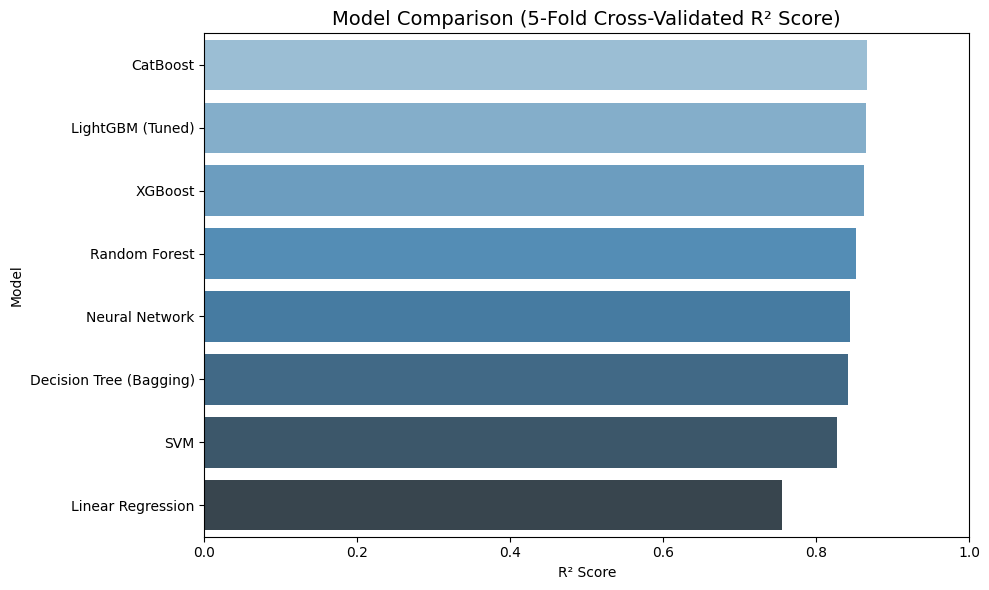

In [50]:
# Visualization of Cross-Validated R² Scores

# Sort results for cleaner plot
sorted_cv_df = cv_results_df.sort_values(by='R² Score', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='R² Score', y='Model', data=sorted_cv_df, palette='Blues_d')

plt.title("Model Comparison (5-Fold Cross-Validated R² Score)", fontsize=14)
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

In [51]:
# Overfitting Check

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on training and test sets
y_train_pred = models['CatBoost'].predict(X_train)
y_test_pred = models['CatBoost'].predict(X_test)

# Reverse log transformation (since y = np.log1p(original delivery time))
y_train_actual = np.expm1(y_train)
y_test_actual = np.expm1(y_test)
y_train_pred_actual = np.expm1(y_train_pred)
y_test_pred_actual = np.expm1(y_test_pred)

# Training metrics
train_mae = mean_absolute_error(y_train_actual, y_train_pred_actual)
train_rmse = np.sqrt(mean_squared_error(y_train_actual, y_train_pred_actual))
train_r2 = r2_score(y_train_actual, y_train_pred_actual)

# Testing metrics
test_mae = mean_absolute_error(y_test_actual, y_test_pred_actual)
test_rmse = np.sqrt(mean_squared_error(y_test_actual, y_test_pred_actual))
test_r2 = r2_score(y_test_actual, y_test_pred_actual)

# Display results
print("Overfitting Check for CatBoost:")
print(f"\n🔹 Training Set:\nMAE: {train_mae:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.4f}")
print(f"\n🔹 Test Set:\nMAE: {test_mae:.2f}, RMSE: {test_rmse:.2f}, R²: {test_r2:.4f}")

# Conclusion
if abs(train_r2 - test_r2) > 0.05:
    print("\nPotential overfitting detected: Large gap between training and test R² scores.")
else:
    print("\nNo major overfitting detected: Training and test performance are consistent.")

Overfitting Check for CatBoost:

🔹 Training Set:
MAE: 16.34, RMSE: 21.19, R²: 0.8312

🔹 Test Set:
MAE: 17.41, RMSE: 22.63, R²: 0.8129

No major overfitting detected: Training and test performance are consistent.


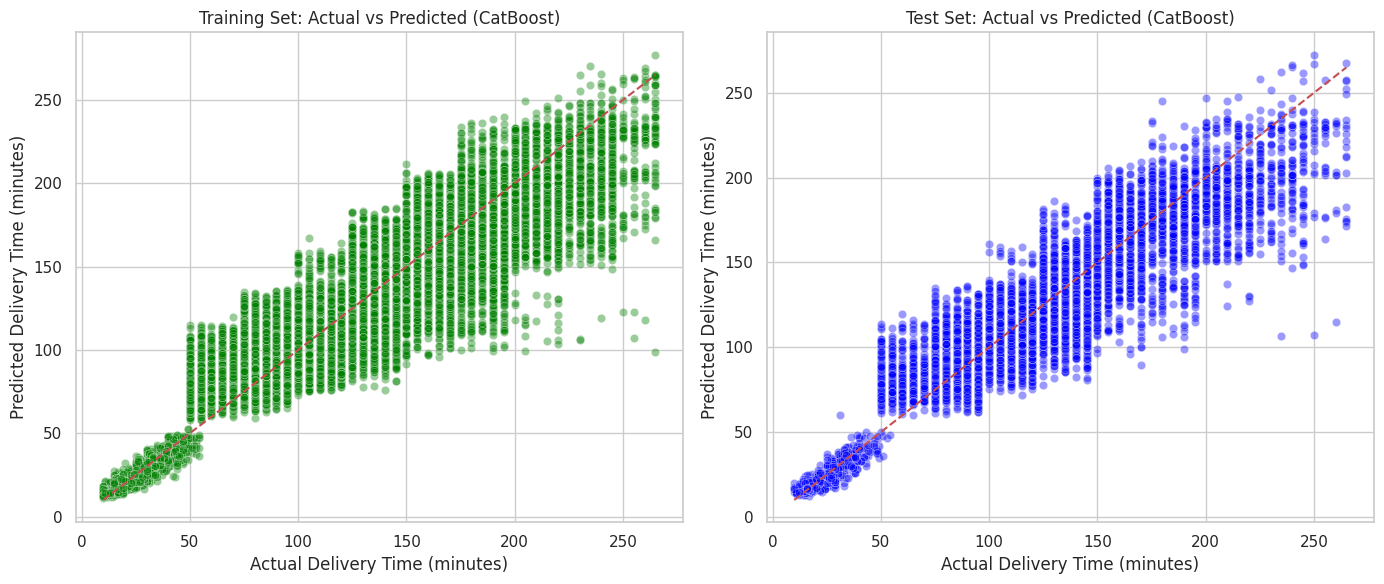

In [52]:
# Visualization: Actual vs Predicted for CatBoost

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reverse log-transform to get actual values
y_train_actual = np.expm1(y_train)
y_test_actual = np.expm1(y_test)
y_train_pred = np.expm1(models['CatBoost'].predict(X_train))
y_test_pred = np.expm1(models['CatBoost'].predict(X_test))

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Plot for Training Set
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_actual, y=y_train_pred, alpha=0.4, color='green')
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], 'r--')
plt.title("Training Set: Actual vs Predicted (CatBoost)")
plt.xlabel("Actual Delivery Time (minutes)")
plt.ylabel("Predicted Delivery Time (minutes)")

# Plot for Test Set
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_actual, y=y_test_pred, alpha=0.4, color='blue')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--')
plt.title("Test Set: Actual vs Predicted (CatBoost)")
plt.xlabel("Actual Delivery Time (minutes)")
plt.ylabel("Predicted Delivery Time (minutes)")

plt.tight_layout()
plt.show()

## **Save the Best Model (using joblib)**

Based on the cross-validated evaluation metrics, CatBoost emerged as the best-performing model for predicting delivery time. It achieved the highest R² Score of 0.8666, indicating that it explains approximately 87% of the variance in delivery time. Furthermore, it maintained a low MAE of 0.15 and RMSE of 0.19 (on the log-transformed scale), outperforming all other models in both accuracy and consistency.

This strong balance of high predictive power, low error, and efficiency makes CatBoost the most suitable and reliable choice for this last-mile delivery time regression problem.

In [53]:
import joblib

# Access the trained CatBoost model from the models dictionary
catboost_model = models['CatBoost']  # Assuming 'models' dict was used for training

# Save the model to disk
joblib.dump(catboost_model, 'best_catboost_model.pkl')

print("CatBoost model saved successfully as 'best_catboost_model.pkl'.")

CatBoost model saved successfully as 'best_catboost_model.pkl'.


## **Load the Model & Make a Sample Prediction**

In [54]:
import joblib

# Load the saved CatBoost model
loaded_model = joblib.load('best_catboost_model.pkl')

# Take the first row from the test set
sample_input = X_test.iloc[0:1]  # DataFrame format

# Show the input used for prediction
print("Input features for prediction:")
print(sample_input.T)  # Transpose for readability

# Predict
predicted_time = loaded_model.predict(sample_input)

print("\nPredicted Delivery Time (minutes):", round(predicted_time[0], 2))

Input features for prediction:
                       43116
Agent_Age           0.421053
Agent_Rating            0.92
Order_Hour          0.956522
Distance_km         0.938036
Weather_Sandstorms      True
Weather_Stormy         False
Weather_Sunny          False
Weather_Windy          False
Traffic_Jam            False
Traffic_Low             True
Traffic_Medium         False
Vehicle_scooter         True
Vehicle_van            False
Area_Other             False
Area_Semi-Urban        False
Area_Urban              True
Category_Grocery       False
Category_Toys          False

Predicted Delivery Time (minutes): 4.25


## **Conclusion**

- CatBoost performed the best among all models with the highest R² Score of 0.8666, meaning it explained around 87 percent of the delivery time variation.  
  It also had the lowest errors with MSE 0.04, RMSE 0.19, and MAE 0.15.

- LightGBM Tuned and XGBoost came very close behind CatBoost, both showing high accuracy and low error, making them very reliable alternatives.

- Random Forest and Decision Tree with Bagging also performed well with R² above 0.84, showing that tree-based models work great for this problem.

- SVM gave decent results with R² Score 0.8274, but it was slightly less accurate compared to the top ensemble models.

- Linear Regression had lower accuracy with R² Score 0.7559, showing it couldn’t capture complex patterns in the data.

- Neural Network performed the lowest among all models with R² Score 0.6575, possibly due to limited training or data size.

- The final recommendation is to use CatBoost for model deployment, given its higher accuracy, consistency, and need for less preprocessing than other models.